1. Загрузите файл HR.csv в pandas dataframe

In [95]:
import pandas as pd
df = pd.read_csv('hr.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [96]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [97]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
df.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [99]:
corr_matrix =df.corr().round(2)
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


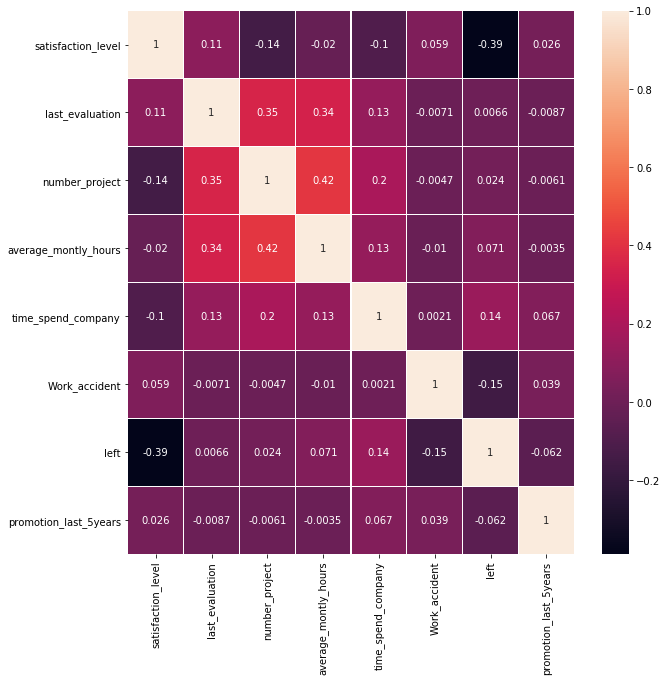

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(),annot=True,linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

4 Рассчитайте сколько сотрудников работает в каждом департаменте.

In [124]:
workers_in_dep = df.groupby('department').count().rename(columns={"satisfaction_level": "workers"}).iloc[:,0:1]
workers_in_dep

,workers
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


5 Показать распределение сотрудников по зарплатам.

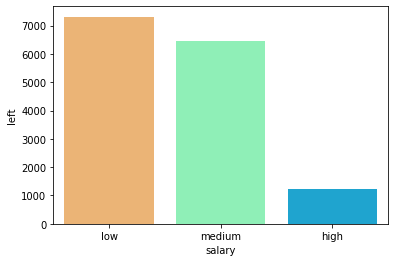

In [125]:
sns.barplot(x='salary', y='left', data=df, estimator=len, palette="rainbow_r")

6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

Text(0.5, 0, 'salary')

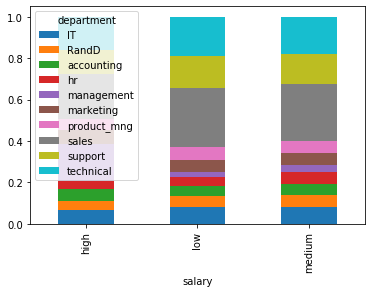

In [126]:
table=pd.crosstab(df.salary, df.department) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.xlabel('salary') 

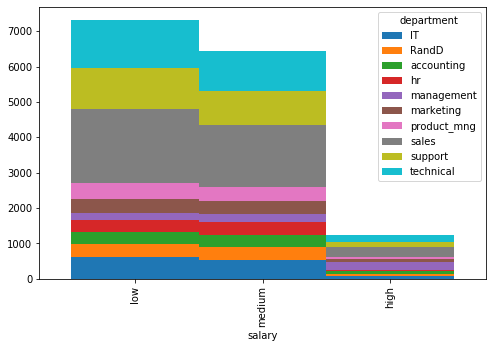

In [127]:
x = df.groupby(['salary', 'department']).count().reindex(["low", "medium", "high"], level=0)
x_unstack = x['satisfaction_level'].unstack()
x_unstack.plot(kind='bar', stacked=True, width = 1, figsize=(8,5))
plt.show()

7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [128]:
df.shape

(14999, 10)

In [129]:
salary_high_low = ['high','low']
df2 = df.loc[df['salary'].isin(salary_high_low)]
df2.shape

(8553, 10)

In [130]:
def get_value_2(row):
    if row['salary'] == 'low':
        return 1
    elif row['salary'] == 'high':
        return 2

In [131]:
from scipy.stats import chi2_contingency

df2['salary_2'] = df2.apply(get_value_2, axis = 1)

stat, p, dof, expected = chi2_contingency(pd.crosstab(df2['salary_2'],df2['average_montly_hours']))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Количество часов не зависит от зарплаты')
else:
    print('Количество часов зависит от зарплаты')

stat=335.654, p=0.000
Количество часов зависит от зарплаты


C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


8 Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
●Доля сотрудников с повышением за последние 5 лет
●Средняя степень удовлетворенности
●Среднее количество проектов

In [132]:
left1 = ['1']
df3 = df.loc[df['left'].isin(left1)]
df3.shape

(3571, 10)

In [133]:
df3.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [134]:
sum_ = df3['promotion_last_5years'].count()
promotion_last_5years = ['1']
sum_with_promotion = df3['promotion_last_5years'].loc[df3['promotion_last_5years'].isin(promotion_last_5years)].count()
#sum_with_promotion

In [135]:
#Доля сотрудников с повышением за последние 5 лет - среди уволенных
part = sum_with_promotion / sum_
part

0.005320638476617194

In [136]:
#Средняя степень удовлетворенности - среди уволенных
df3['satisfaction_level'].mean()

0.44009801176140917

In [137]:
#Среднее количество проектов - среди уволенных
df3['number_project'].mean()

3.8555026603192384

In [138]:
left0 = ['0']
df4 = df.loc[df['left'].isin(left0)]
df4.shape

(11428, 10)

In [139]:
sum_0 = df4['promotion_last_5years'].count()
promotion_last_5years_0 = ['1']
sum_with_promotion_0 = df4['promotion_last_5years'].loc[df4['promotion_last_5years'].isin(promotion_last_5years_0)].count()
#sum_with_promotion_0

In [140]:
#Доля сотрудников с повышением за последние 5 лет - среди работающих
part = sum_with_promotion_0 / sum_0
part

0.026251312565628283

In [141]:
#Средняя степень удовлетворенности - среди работающих
df4['satisfaction_level'].mean()

0.666809590479516

In [142]:
#Среднее количество проектов - среди работающих
df4['number_project'].mean()

3.786664333216661